In [45]:
import pandas as pd

import networkx as nx

from scipy.stats import shapiro 

import matplotlib.pyplot as plt

In [46]:
interactome_df = pd.read_csv('./data/Interactome_human.tsv', sep='\t', header=None)
G = nx.from_pandas_edgelist(interactome_df, 0, 1, edge_attr=True)

candidates_MMAF = pd.read_pickle("./data/candidateGenesList_MMAF.p")
candidates_NOA = pd.read_pickle("./data/candidateGenesList_NOA.p")

nonCandidates_MMAF = [n for n in list(G.nodes) if n not in candidates_MMAF]
nonCandidates_NOA = [n for n in list(G.nodes) if n not in candidates_NOA]

In [47]:
# calculate harmonic centrality for MMAF
res_hc_MMAF = nx.harmonic_centrality(G, nbunch=nonCandidates_MMAF, sources=candidates_MMAF)
res_hc_MMAF_sorted = dict(sorted(res_hc_MMAF.items(), key=lambda v: v[1], reverse=True))

In [48]:
# calculate harmonic centrality for NOA
res_hc_NOA = nx.harmonic_centrality(G, nbunch=nonCandidates_NOA, sources=candidates_NOA)
res_hc_NOA_sorted = dict(sorted(res_hc_NOA.items(), key=lambda v: v[1], reverse=True))

Text(0.5, 1.0, 'Harmonic centrality distribution NOA')

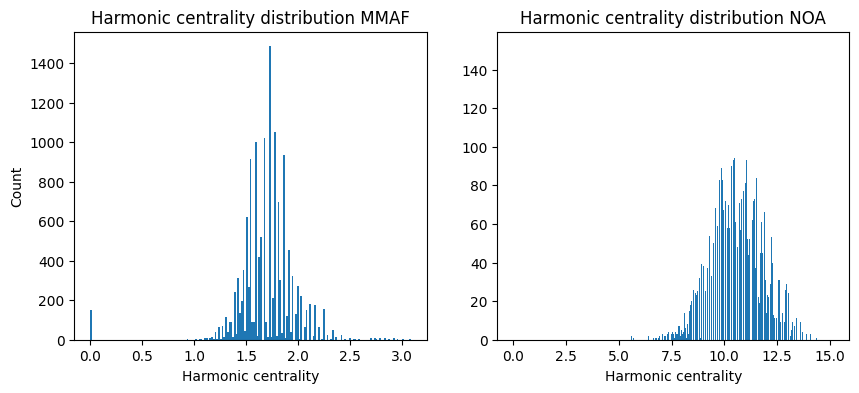

In [49]:
# plot harmonic centrality distributions in MMAF and NOA

res_hc_MMAF_list = [v for k, v in res_hc_MMAF_sorted.items()]
res_hc_NOA_list = [v for k, v in res_hc_NOA_sorted.items()]


fig, axs = plt.subplots(1, 2, figsize=(10, 4))

bins_MMAF = len(set(res_hc_MMAF_list))
axs[0].hist(res_hc_MMAF_list, bins=bins_MMAF)
axs[0].set_ylabel("Count")
axs[0].set_xlabel("Harmonic centrality")
axs[0].set_title("Harmonic centrality distribution MMAF")

bins_NOA = len(set(res_hc_NOA_list))
axs[1].hist(res_hc_NOA_list, bins=bins_NOA)
axs[1].set_xlabel("Harmonic centrality")
axs[1].set_title("Harmonic centrality distribution NOA")

In [50]:
# check if the distributions are normal
shapiro(res_hc_MMAF_list), shapiro(res_hc_NOA_list)

/tmp/ipykernel_14377/3751939821.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14458.
  shapiro(res_hc_MMAF_list), shapiro(res_hc_NOA_list)
/tmp/ipykernel_14377/3751939821.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14425.
  shapiro(res_hc_MMAF_list), shapiro(res_hc_NOA_list)


(ShapiroResult(statistic=0.8406906116505859, pvalue=6.446761492785133e-80),
 ShapiroResult(statistic=0.8224171465557681, pvalue=2.682321303061098e-82))

In [51]:
# combine results into one df
df_MMAF = pd.DataFrame.from_dict(res_hc_MMAF_sorted, orient='index', columns=['HC_MMAF'])
df_NOA = pd.DataFrame.from_dict(res_hc_NOA_sorted, orient='index', columns=['HC_NOA'])
df = pd.merge(df_MMAF, df_NOA, left_index=True, right_index=True, how='outer')

In [52]:
# identify non-candidate genes potentially responsible for NOA
df['DIFF'] = abs(df['HC_MMAF'] - df['HC_NOA'])
df.sort_values(by='DIFF', ascending=False)

,HC_MMAF,HC_NOA,DIFF
ENSG00000170365,1.916667,15.166667,13.250000
ENSG00000097007,1.950000,14.783333,12.833333
ENSG00000163513,2.000000,14.666667,12.666667
ENSG00000170312,2.000000,14.500000,12.500000
ENSG00000112062,1.916667,14.333333,12.416667
...,...,...,...
ENSG00000187713,1.683333,NaN,NaN
ENSG00000188738,NaN,8.416667,NaN
ENSG00000196584,1.766667,NaN,NaN
ENSG00000204410,1.733333,NaN,NaN


In [53]:
df.sort_values(by=['HC_MMAF', 'DIFF'], ascending=[False, True])

,HC_MMAF,HC_NOA,DIFF
ENSG00000155875,3.083333,12.616667,9.533333
ENSG00000172053,3.083333,13.166667,10.083333
ENSG00000166886,3.000000,12.816667,9.816667
ENSG00000174099,3.000000,12.816667,9.816667
ENSG00000068024,3.000000,12.950000,9.950000
...,...,...,...
ENSG00000124721,NaN,9.750000,NaN
ENSG00000129646,NaN,10.883333,NaN
ENSG00000130413,NaN,9.800000,NaN
ENSG00000137473,NaN,9.833333,NaN


### Calculate HC without Reactome

In [54]:
interactome_no_reactome_df = pd.read_csv('./data/Interactome_human_no_Reactome.tsv', sep='\t', header=None)

In [55]:
# calculate harmonic centrality for MMAF
res_hc_MMAF = nx.harmonic_centrality(G, nbunch=nonCandidates_MMAF, sources=candidates_MMAF)
res_hc_MMAF_sorted = dict(sorted(res_hc_MMAF.items(), key=lambda v: v[1], reverse=True))

In [56]:
# calculate harmonic centrality for NOA
res_hc_NOA = nx.harmonic_centrality(G, nbunch=nonCandidates_NOA, sources=candidates_NOA)
res_hc_NOA_sorted = dict(sorted(res_hc_NOA.items(), key=lambda v: v[1], reverse=True))

In [57]:
# combine results into one df
df_MMAF = pd.DataFrame.from_dict(res_hc_MMAF_sorted, orient='index', columns=['HC_MMAF_noR'])
df_NOA = pd.DataFrame.from_dict(res_hc_NOA_sorted, orient='index', columns=['HC_NOA_noR'])
df_noReactome = pd.merge(df_MMAF, df_NOA, left_index=True, right_index=True, how='outer')
df_all = pd.merge(df, df_noReactome, left_index=True, right_index=True, how='outer')

In [58]:
df_all

,HC_MMAF,HC_NOA,DIFF,HC_MMAF_noR,HC_NOA_noR
ENSG00000000003,1.550000,10.533333,8.983333,1.550000,10.533333
ENSG00000000005,1.650000,11.100000,9.450000,1.650000,11.100000
ENSG00000000419,1.866667,11.300000,9.433333,1.866667,11.300000
ENSG00000000457,2.233333,11.366667,9.133333,2.233333,11.366667
ENSG00000000460,1.733333,10.100000,8.366667,1.733333,10.100000
...,...,...,...,...,...
ENSG00000278570,1.783333,11.100000,9.316667,1.783333,11.100000
ENSG00000278615,1.500000,9.616667,8.116667,1.500000,9.616667
ENSG00000278619,1.783333,12.583333,10.800000,1.783333,12.583333
ENSG00000278685,1.500000,9.100000,7.600000,1.500000,9.100000


Text(0, 0.5, 'Harmonic centrality')

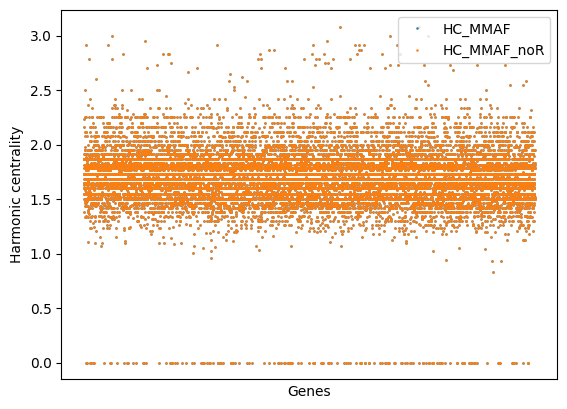

In [59]:
# compare HC with and without Reactome
df_all[['HC_MMAF', 'HC_MMAF_noR']].plot(style='o', ms=0.8)
plt.xlabel('Genes')
plt.xticks([])
plt.ylabel('Harmonic centrality')

In [60]:
# calculate the difference in HC with and without Reactome
df_all['DIFF_noReactome'] = df_all['HC_MMAF'] - df_all['HC_MMAF_noR']

In [61]:
df_all[df_all['DIFF_noReactome'] != 0] # there's no difference -- why?

,HC_MMAF,HC_NOA,DIFF,HC_MMAF_noR,HC_NOA_noR,DIFF_noReactome
ENSG00000066185,NaN,13.483333,NaN,NaN,13.483333,NaN
ENSG00000118690,NaN,8.516667,NaN,NaN,8.516667,NaN
ENSG00000124721,NaN,9.750000,NaN,NaN,9.750000,NaN
ENSG00000129646,NaN,10.883333,NaN,NaN,10.883333,NaN
ENSG00000130413,NaN,9.800000,NaN,NaN,9.800000,NaN
ENSG00000137473,NaN,9.833333,NaN,NaN,9.833333,NaN
ENSG00000188738,NaN,8.416667,NaN,NaN,8.416667,NaN


### Remove MMAF candidate genes and calculate HC

In [62]:
# remove one candidate and add it to non candidates
candidates_MMAF_new = candidates_MMAF[:-1]
print(f"Removed gene {candidates_MMAF[-1]} from candidates")
nonCandidates_MMAF_new = nonCandidates_MMAF + [candidates_MMAF[-1]]

Removed gene ENSG00000066185 from candidates


In [63]:
# calculate harmonic centrality for MMAF without one candidate
res_hc_MMAF = nx.harmonic_centrality(G, nbunch=nonCandidates_MMAF_new, sources=candidates_MMAF_new)
res_hc_MMAF_sorted = dict(sorted(res_hc_MMAF.items(), key=lambda v: v[1], reverse=True))

In [64]:
df_MMAF_new = pd.DataFrame.from_dict(res_hc_MMAF_sorted, orient='index', columns=['HC_MMAF_new'])

In [65]:
df_new = pd.merge(df_MMAF_new, df, left_index=True, right_index=True, how='outer')

In [66]:
df_new

,HC_MMAF_new,HC_MMAF,HC_NOA,DIFF
ENSG00000000003,1.300000,1.550000,10.533333,8.983333
ENSG00000000005,1.400000,1.650000,11.100000,9.450000
ENSG00000000419,1.533333,1.866667,11.300000,9.433333
ENSG00000000457,1.733333,2.233333,11.366667,9.133333
ENSG00000000460,1.400000,1.733333,10.100000,8.366667
...,...,...,...,...
ENSG00000278570,1.450000,1.783333,11.100000,9.316667
ENSG00000278615,1.250000,1.500000,9.616667,8.116667
ENSG00000278619,1.450000,1.783333,12.583333,10.800000
ENSG00000278685,1.250000,1.500000,9.100000,7.600000


In [67]:
df_new.describe()

,HC_MMAF_new,HC_MMAF,HC_NOA,DIFF
count,14459.000000,14458.000000,14425.000000,14418.000000
mean,1.393180,1.700187,10.424365,8.724522
std,0.218526,0.286488,1.657532,1.407990
min,0.000000,0.000000,0.000000,0.000000
25%,1.300000,1.550000,9.666667,8.066667
50%,1.400000,1.733333,10.483333,8.766667
75%,1.500000,1.833333,11.350000,9.516667
max,2.416667,3.083333,15.166667,13.250000


In [68]:
# find HC for the removed candidate
df_new.loc['ENSG00000066185']['HC_MMAF_new']

2.333333333333333

In [69]:
# find genes with higher HC than removed candidate
df_new[df_new['HC_MMAF_new'] > 2.3]

,HC_MMAF_new,HC_MMAF,HC_NOA,DIFF
ENSG00000066185,2.333333,NaN,13.483333,NaN
ENSG00000111640,2.333333,2.666667,13.750000,11.083333
ENSG00000150093,2.416667,2.750000,13.283333,10.533333


Text(2.33, -100, '2.33')

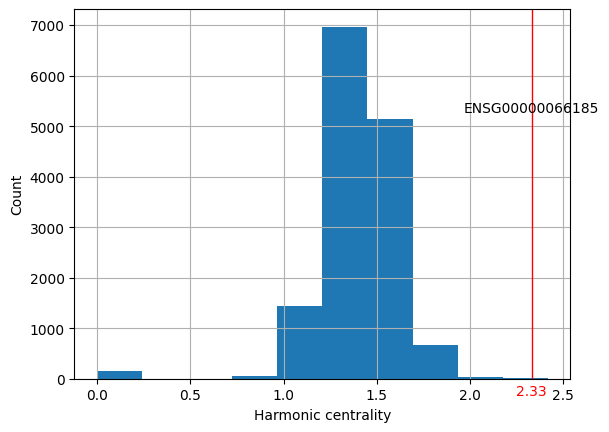

In [70]:
# plot distribution of harmonic centrality for MMAF candidates (without the removed candidate)
# as well as the harmonic centrality for the removed candidate
df_new['HC_MMAF_new'].hist()
plt.ylabel("Count")
plt.xlabel("Harmonic centrality")
plt.axvline(2.33, color='red', linewidth=1)
plt.text(2.33, 5500, 'ENSG00000066185', color='black', ha='center', va='top')
plt.text(2.33, -100, '2.33', color='red', ha='center', va='top')

Text(0, 0.5, 'Harmonic centrality')

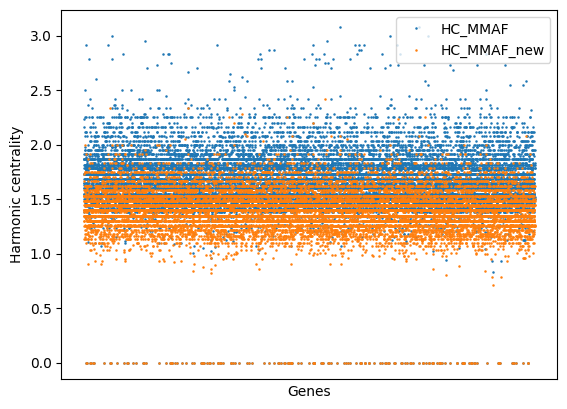

In [71]:
# compare harmonic centrality for MMAF with and without one candidate
df_new[['HC_MMAF', 'HC_MMAF_new']].plot(style='o', ms=0.8)
plt.xlabel('Genes')
plt.xticks([])
plt.ylabel('Harmonic centrality')

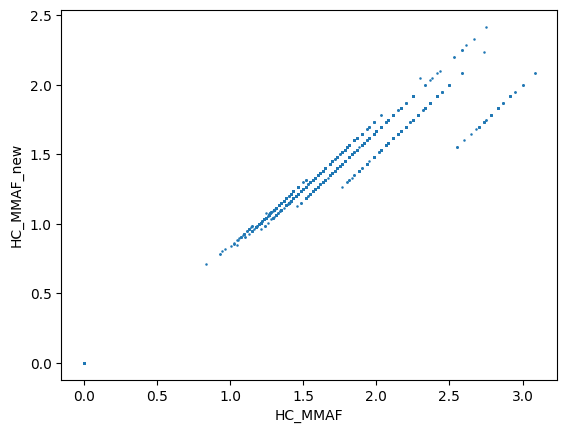

In [72]:
df_new.plot(x='HC_MMAF', y='HC_MMAF_new', style='o', ms=0.8)
plt.xlabel('HC_MMAF')
plt.ylabel('HC_MMAF_new')
plt.legend().remove()

### Normalize HC by dividing by the number of candidate genes -- beter to compare results?

In [73]:
df_new['HC_MMAF_norm'] = df_new['HC_MMAF'] / len(candidates_MMAF)
df_new['HC_MMAF_new_norm'] = df_new['HC_MMAF_new'] / len(candidates_MMAF_new)

In [74]:
df_new

,HC_MMAF_new,HC_MMAF,HC_NOA,DIFF,HC_MMAF_norm,HC_MMAF_new_norm
ENSG00000000003,1.300000,1.550000,10.533333,8.983333,0.172222,0.162500
ENSG00000000005,1.400000,1.650000,11.100000,9.450000,0.183333,0.175000
ENSG00000000419,1.533333,1.866667,11.300000,9.433333,0.207407,0.191667
ENSG00000000457,1.733333,2.233333,11.366667,9.133333,0.248148,0.216667
ENSG00000000460,1.400000,1.733333,10.100000,8.366667,0.192593,0.175000
...,...,...,...,...,...,...
ENSG00000278570,1.450000,1.783333,11.100000,9.316667,0.198148,0.181250
ENSG00000278615,1.250000,1.500000,9.616667,8.116667,0.166667,0.156250
ENSG00000278619,1.450000,1.783333,12.583333,10.800000,0.198148,0.181250
ENSG00000278685,1.250000,1.500000,9.100000,7.600000,0.166667,0.156250


Text(0, 0.5, 'Harmonic centrality')

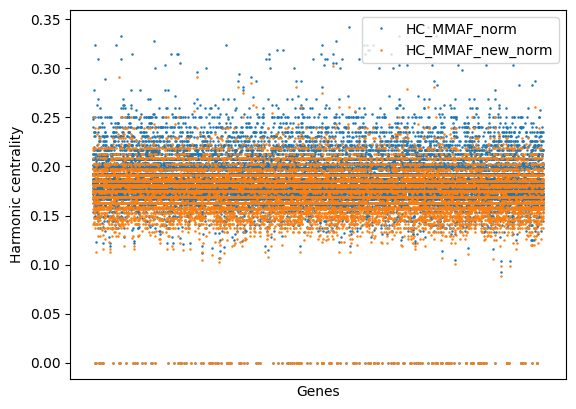

In [75]:
# compare harmonic centrality (normalized by number of candidates) for MMAF with and without one candidate
df_new[['HC_MMAF_norm', 'HC_MMAF_new_norm']].plot(style='o', ms=0.8)
plt.xlabel('Genes')
plt.xticks([])
plt.ylabel('Harmonic centrality')

In [76]:
df_new

,HC_MMAF_new,HC_MMAF,HC_NOA,DIFF,HC_MMAF_norm,HC_MMAF_new_norm
ENSG00000000003,1.300000,1.550000,10.533333,8.983333,0.172222,0.162500
ENSG00000000005,1.400000,1.650000,11.100000,9.450000,0.183333,0.175000
ENSG00000000419,1.533333,1.866667,11.300000,9.433333,0.207407,0.191667
ENSG00000000457,1.733333,2.233333,11.366667,9.133333,0.248148,0.216667
ENSG00000000460,1.400000,1.733333,10.100000,8.366667,0.192593,0.175000
...,...,...,...,...,...,...
ENSG00000278570,1.450000,1.783333,11.100000,9.316667,0.198148,0.181250
ENSG00000278615,1.250000,1.500000,9.616667,8.116667,0.166667,0.156250
ENSG00000278619,1.450000,1.783333,12.583333,10.800000,0.198148,0.181250
ENSG00000278685,1.250000,1.500000,9.100000,7.600000,0.166667,0.156250


In [77]:
# find genes that are the most affected by adding/removing candidate genes
df_new['DIFF_norm'] = df_new['HC_MMAF_norm'] - df_new['HC_MMAF_new_norm']

In [78]:
df_new.sort_values(by='DIFF_norm', ascending=False)

,HC_MMAF_new,HC_MMAF,HC_NOA,DIFF,HC_MMAF_norm,HC_MMAF_new_norm,DIFF_norm
ENSG00000205922,1.55,2.55,10.116667,7.566667,0.283333,0.19375,0.089583
ENSG00000174279,1.55,2.55,9.916667,7.366667,0.283333,0.19375,0.089583
ENSG00000241484,1.55,2.55,10.233333,7.683333,0.283333,0.19375,0.089583
ENSG00000025708,1.60,2.60,10.716667,8.116667,0.288889,0.20000,0.088889
ENSG00000124602,1.65,2.65,10.266667,7.616667,0.294444,0.20625,0.088194
...,...,...,...,...,...,...,...
ENSG00000124721,NaN,NaN,9.750000,NaN,NaN,NaN,NaN
ENSG00000129646,NaN,NaN,10.883333,NaN,NaN,NaN,NaN
ENSG00000130413,NaN,NaN,9.800000,NaN,NaN,NaN,NaN
ENSG00000137473,NaN,NaN,9.833333,NaN,NaN,NaN,NaN


### Do the same for NOA: Remove NOA candidate genes and calculate HC

In [79]:
# remove one candidate and add it to non candidates
candidates_NOA_new = candidates_NOA[:-1]
print(f"Removed gene {candidates_NOA[-1]} from candidates")
nonCandidates_NOA_new = nonCandidates_NOA + [candidates_NOA[-1]]

Removed gene ENSG00000141497 from candidates


In [80]:
# calculate harmonic centrality for NOA without one candidate
res_hc_NOA = nx.harmonic_centrality(G, nbunch=nonCandidates_NOA_new, sources=candidates_NOA_new)
res_hc_NOA_sorted = dict(sorted(res_hc_NOA.items(), key=lambda v: v[1], reverse=True))

In [81]:
df_NOA_new = pd.DataFrame.from_dict(res_hc_NOA_sorted, orient='index', columns=['HC_NOA_new'])

In [82]:
df_new = pd.merge(df_NOA_new, df, left_index=True, right_index=True, how='outer')